(chap:7-differenceEq)=
# 差分方程式と経済分析

<div name="html-admonition" style="font-size: 0.8em">
<input type="button" onclick="location.href='https://translate.google.com/translate?hl=&sl=ja&tl=en&u='+window.location;" value="Google translation" style="color:#ffffff;background-color:#008080; height:25px" onmouseover="this.style.background='#99ccff'" onmouseout="this.style.background='#008080'"/> in English or the language of your choice.
</div><br>

In [1]:
import japanize_matplotlib
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm

## はじめに

この章ではまず第一に，動学モデルの基礎（の基礎）を理解することである。マクロ経済は時間を考慮せざるを得ない。経済成長，インフレ，デフレ，景気循環などは全て時間軸に沿って考える必要がある。マクロ経済では変数の変化が重要な役割を果たすためである。そして時間と密接に関係するのがpersistenceと呼ばれるマクロ変数の特徴である。persistenceとは，マクロ変数が一度ある状態に陥ると，その状態が継続する傾向にある性質を指す。典型的な例がデフレである。日本はデフレからなかなか脱却できないが，それがデフレのpersistenceである。これは前期の影響が今期に，今期の影響が来期に現れることによって発生する。時間という概念から離れてpersistenceを考えるのは難しい。一方で，時間を扱う「動学」と聞くと難しく感じるかもしれないが，構える必要はない。高校数学で習った漸化式（以下では「差分方程式」を同義として扱う）を使うが，解法テクニックが重要ではなく，漸化式の考え方を捉えるコードを書き，後は`Python`が計算することになる。

## 1階差分方程式

### 説明

差分方程式（漸化式）とは，初期の値を所与として値の数列を定義する方程式である。言い換えると，$t$期の変数の値は$t-1$期やそれ以前の値に依存する関係を表す式である。例を考えよう。

$$
x_{t+1}=ax_t+b,\quad b\geq0
$$

$x_0$は与えられていると仮定しよう。連続して代入する（逐次代入法）。

$$
\begin{align*}
x_{t+1}
&=ax_t+b\\
&=a(ax_{t-1}+b)+b=a^2x_{t-1}+b(1+a) \\
&=a^2(ax_{t-2}+b)+b(1+a)=a^3x_{t-2}+b(1+a+a^2) \\
&=a^3(ax_{t-3}+b)+b(1+a+a^2)=a^4x_{t-3}+b(1+a+a^2+a^3) \\
&\qquad\vdots \\
&=a^{t+1}x_0+b\sum_{i=0}^ta^t
\end{align*}
$$

このことから次のことがわかる。

$t\rightarrow\infty$とすると（$x_0\ne 0$）
* $a=1$の場合
    * $b=0$の場合，$x_t$は同じ値$x_0$にとどまる。
    * $b>0$の場合，$b\sum_{i=0}^ta^t\rightarrow\infty$となり$x_t$は発散する。
    * $b<0$の場合，$b\sum_{i=0}^ta^t\rightarrow-\infty$となり$x_t$は発散する。
* $a=-1$の場合
    * $b$の値に関わらず，$x_t$は振動する。
* $a>1$の場合，$a^{t+1}\rightarrow\infty$となり$x_t$は正の無限大に発散する。
* $a<-1$の場合，$x_t$は振動し$a^{t+1}\rightarrow\infty$もしくは$-\infty$となり発散する。
* $|a|<1$の場合$x_t$は収束
    * $0<a<1$の場合は単調的に収束
    * $-1<a<0$の場合は振動し収束
    * $a^{t+1}x_0\rightarrow 0$
    * $\sum_{i=0}^ta^t$は$S$に収束する。
    
        $$
        \begin{align*}
            S&=\sum_{i=0}^{\infty}a^t=1+a+a^2+a^3+\cdots \\
            aS&=a+a^2+a^3+\cdots \\
            S-aS&=1 \\
            &\Downarrow \\
            S&=\dfrac{1}{1-a}
        \end{align*}
        $$
    
    * $t\rightarrow\infty$の場合の$x_t$の値を$x_{*}$としよう。$t\rightarrow\infty$の下では$x_t=x_{t-1}\equiv x_{*}$となるため以下が成立する。
    
        $$
        x_{*}=ax_{*}+b
        \quad
        \Rightarrow
        \quad
        x_{*}=\dfrac{b}{1-a}=bS
        $$

均衡を考える上で$x_t$が発散するケースは除外し，収束するケースに着目する。

### 例１

$$
x_{t+1}=0.4x_{t}+3
$$ (eq:8-1)

* $0.4<1$なため収束することが分かる。
* 定常状態は次の値となる。

    $$
    x_{*}=0.4x_{*}+3
    \quad\Rightarrow\quad
    x_{*}=\dfrac{3}{1-0.4}=5
    $$

ここでまとめたことは{numref}`fig:8-ex1`から確認できる。
* ① 初期を$x_0<5$（例えば，1）とする。
* ② $x_0$を所与として式[](eq:8-1)の右辺によって$x_1$が決まる。
* ③ $x_1$を縦軸で確かめる。
* ④ ③から平行移動した45度線上の点
* ⑤ ④から垂直に降りて横軸に$x_1$を確認できる。
* ⑥ $x_1$を所与として式[](eq:8-1)の右辺によって$x_2$が決まる。
* ⑦ $x_2$を縦軸で確かめる。
* ⑧ ⑦から平行移動した45度線上の点
* ⑨ ⑧から垂直に降りて横軸に$x_2$を確認できる。
* このプロセスのリピートし最終的に定常状態（$x_t=x_{t+1}$）に収束する

この場合の定常状態を「安定的（stable）」と呼ぶ。ここで覚えて欲しいことは，まず第一に式[](eq:8-1)と45度線の交点が定常状態である。そして45度線の傾きは1に対して式[](eq:8-1)の傾きは0.4なので，式[](eq:8-1)は「上から」45度線と交わっている。

```{figure} /images/ex1.jpeg
---
scale: 35%
name: fig:8-ex1
---
例１
```

次にコードを書いて$x_t$を計算しプロットするが，３つの方法を紹介する。

#### 方法１

計算した$x$の値を一時的に割り当てるアップデート用の変数を使う方法を考える。この方法は，下で説明する方法１と２よりも`Python`的（Pythonic）な方法であり，一番オススメの方法である。

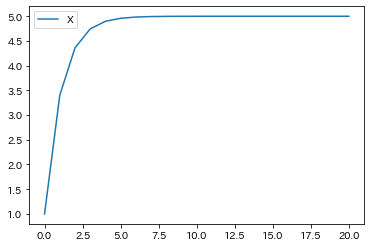

In [2]:
x = 1                  # 1

x_list = [x]           # 2

for i in range(20):
    
    x = 0.4*x + 3      # 3
        
    x_list.append(x)   # 4

df = pd.DataFrame({'X':x_list})
df.plot()
pass

```{admonition} コードの説明
:class: dropdown

1. `x`はアップデート用の変数として設定するために初期値を1とする。
2. 初期値が入ったリストであり、このリストに計算結果を追加する。
3. 来期の`x`の計算
    * １回目のループ：右辺では(1)で設定した`x`の初期値を使い計算し，結果を左辺の`x`に割り当てる。この時点で，(1)の`x`は(3)の左辺の`x`と同じ変数なので，同じ計算結果が割り当てられアップデートされる。
    * ２回目以降のループ：右辺では`x`の最新の値を使い計算し，結果を左辺の`x`に割り当てる。この時点，(1)の`x`は(3)の左辺の`x`と同じ変数なので，同じ計算結果が割り当てられアップデートされる。
4. (3)の左辺の`x`を(2)のリストに追加する。
```

この図の縦軸は$x_t$であり，小数点になっているが横軸はループの回数となる（自動表示なので整数となる場合もある）。強制的に横軸に整数を表示したい場合は`df.plot()`の代わりに次のコードを使えば良いだろう。
```
ax_ = df.plot()
ax_.set_xticks(range(21))
```

```{admonition} コードの説明
:class: dropdown

* １行目：`.plot()`で生成される「軸」を`ax_`に割り当てる。
* ２行目：`ax_`のメソッド`.set_xticks`は横軸の目盛を設定し，引数には使う目盛を指定する。`range(21)`を使うことで`0`から`10`の全ての整数を指定しているが，`range(0,11,2)`にすれば`0`，`2`，`4`，`6`...といった表示も可能である。
```

#### 方法２

この方法では，値を格納するために使うリストを使うが、その中にある値を直接`for`ループの中で使う。

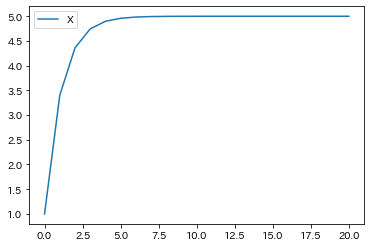

In [3]:
x_list = [1]                     # 1

for i in range(20):
    
    x = 0.4*x_list[i] + 3        # 2
        
    x_list.append(x)             # 3

df = pd.DataFrame({'X':x_list})
df.plot()
pass

```{admonition} 主なコードの説明
:class: dropdown

1. 初期値が入ったリストを用意する。
2. リストの中にある`i`番目の値を使い右辺を計算し`x`に割り当てる。
3. (2)で計算した`x`の値をリストに追加する。
```

#### 方法３

`1`（初期値）と計算する回数分の`Numpy`の`array`を用意し、計算結果をその中に格納する。

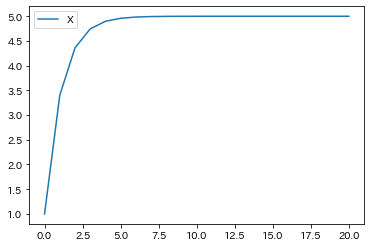

In [4]:
n = 20                          # 1

arr = np.zeros(1+n)             # 2
arr[0] = 1                      # 3

for i in range(n):
    
    arr[i+1] = 0.4*arr[i] + 3   # 4

df = pd.DataFrame({'X':x_list})
df.plot()
pass

```{admonition} コードの説明
:class: dropdown

1. ループの回数
2. `np.zeros()`は引数の数だけ`0`が並ぶ`array`を作成する関数。`1+n`の`1`は(3)で初期値を代入するために必要となる。
3. `arr`の`0`番目に初期値を代入する。
4. 右辺では`arr`の`i`番目の値を使い来期の値を計算し，`=`を使い`arr`の`i+1`番目に代入する。
```

### 例２

$$
x_{t+1}=1.2x_{t}-0.2
$$ (eq:8-ex2)

* $1.2>1$なため発散する。
* 定常状態の値を計算する。

    $$
    x_{*}=1.2x_{*}-0.2
    \quad\Rightarrow\quad
    x_{*}=\dfrac{0.2}{1.2-1.0}=1
    $$

この結果は{numref}`fig:8-ex2`を使って確認できる。図の読み方は例１と同じである。式[](eq:8-ex2)は「下から」45度線を交差している。初期値を$x_0=1.1>x_*$として発散することを示しているが，$x_0<1$の場合でも発散することになる（試してみよう）。この場合の定常状態$x_*$は「不安定（unstable）」と呼ぶ。

```{figure} /images/ex2.jpeg
---
scale: 35%
name: fig:8-ex2
---
例２
```


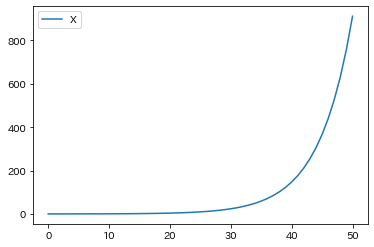

In [5]:
x = 1.1  # 初期値 x0

x_list = [x]

for i in range(50):
    
    x = 1.2*x - 0.2
        
    x_list.append(x)

df = pd.DataFrame({'X':x_list})
df.plot()
pass

### 例３

$$
x_{t+1}=ax_{t}^{0.5},\quad x_t>0,\;a>0
$$ (eq:8-ex3)

この式は上の例と違って非線形の差分方程式となっている。しかし数値計算のための`Python`コードに関しては大きな違いはない。単に，コードの中で非線形の式を書くだけで良い。しかし収束か発散かの安定性（stability）を解析的に確認するには，定常状態の**近傍**を考える必要がある。基本的なアイデアは次のようなものである。定常状態に非常に近い周辺を考えよう。十分に定常状態に近ければ、非線形差分方程式は線形に非常に近くなる。例えば、地球は丸いが、その上で暮らす小さな人間にとって大きな地球は平らに感じる。これは無意識に線形近似を行なっているのと同じである。この考えを使い、非線形差分方程式を定常状態の周りで線形近似することで，あたかも線形の様に考えて安定性を確認できる。手法としてはテイラー展開を使い線形近似する。

＜テイラー展開による１次線形近似＞
* 関数$y=f(k)$を$k_{*}$でテイラー展開すると次式となる。
    $$
    y=f(k_{*})+\left.\frac{df}{dk}\right|_{k=k_{*}}(k-k_{*})
    $$

式[](eq:8-ex3)に当てはめると次のような対応関係にある。
* $y\;\Rightarrow\;x_{t+1}$
* $f(k)\;\Rightarrow\;ak_{t}^{0.5}$
* $z_{*}\;\Rightarrow\;x_{*}=a^2$

式[](eq:8-ex3)をテーラー展開すると

$$
\begin{align*}
x_{t+1}
&=ax_{*}^{0.5}
+\left.0.5ax_{t}^{-0.5}\right|_{x_t=x_{*}}(x_t-x_{*}) \\
&=ax_{*}^{0.5}+0.5ax_{*}^{-0.5}(x_t-x_{*}) \\
&=a\left(a^2\right)^{0.5}+0.5a\left(a^2\right)^{-0.5}(x_t-x_{*}) \\
&=a^{2}+0.5(x_t-a^2)\\
&=0.5x_t+0.5a^2
\end{align*}
$$

となる。$0.5<1$なので収束することが確認できた。図示すると{numref}`fig:8-ex3`の様になる。

```{figure} /images/ex3.jpeg
---
scale: 35%
name: fig:8-ex3
---
例３
```

## 45度線モデル

マクロ経済学の基本モデルとなるケインズの45度線モデルを考えてみる。次の仮定を置く。
* 所得恒等式：$y_t=c_t+inv_t$
* 消費：$c_t=a+by_t$
    * $a>0$：所得とは独立した消費
    * $0<b<1$：限界消費性向
* 投資：$inv_t=d+fy_{t-1}$
    * $t$期の投資は前期である$t-1$期の産出量に依存すると仮定する。工場を建てたりするには時間が掛かる様に投資計画を実行するには時間を要することを捉えている。この仮定により産出量の動学的な動きが発生する事になる。
    * $f>0$：前期の産出量に依存する投資
    * $d>0$：産出量に依存しない投資
* 均衡式：$y_t=a+by_t+d+fy_{t-1}$

均衡式を１期進めると次式となる。

$$
y_{t+1}=\frac{f}{1-b}y_t+\frac{a+d}{1-b}
$$ (eq:8-45degree)
        
この式から次のことが分かる。定常状態の安定性は$\dfrac{f}{1-b}$に依存しており，パラメータの値から定常状態は安定的であり，初期値$y_0$から収束することになる。定常状態を計算しよう。実質変数である$y_t$が一定になる状態なので次式が成立する。

$$
\begin{align*}
    y_{t+1}&=y_t=y_* \\
    &\Downarrow \\
    y_*&=\frac{a+d}{1-b-f}
\end{align*}
$$
    
定常状態で$y_*>0$が成立してこそ意味があるので，$1>b+f$を仮定しよう。モデルの動学を図示したのが{numref}`fig:8-45degree`である。

```{figure} /images/45degree.jpeg
---
scale: 40%
name: fig:8-45degree
---
45度線モデル
```    

次に，実際にコードを書いて$y_t$の動学的な動きを確認してみよう。次の関数を定義する。

In [1]:
def model45(y0,a,b,d,f,n=10):
    """引数                             # 1
            y0: GDPの初期値
            a: 所得に依存しない消費
            b: 限界消費性向
            d: 産出量に依存しない投資
            f: 前期の産出量に依存する投資
            n: ループの回数（デフォルト10）
        戻り値
            yの値からなるDataFrame"""
    
    y = y0                              # 2
    
    y_list = [y0]                       # 3

    for i in range(n):
        
        y = y*f/(1-b) + (a+d)/(1-b)     # 4
        y_list.append(y)                # 5

    yss = (a+d)/(1-b-f)                 # 6
    
    print(f'定常状態での産出量:{yss:.1f}') # 7
    
    return pd.DataFrame({'output':y_list})  # 8

```{admonition} コードの説明
:class: dropdown

1. `"""`と`"""`で挟んだ領域は`docstring`と呼ばれ、関数の説明をする。書かなくても良いが、自分が忘れた頃に関数のコードを読むことになるかも知れないので、書く方がオススメ。

2. `y`はアップデート用の変数であり，初期値`y0`を`y`に割り当てる。
3. 初期値が入ったリストであり，`for`ループで計算する`y`を格納する。
4. 右辺の`y`は(1)の`y`であり，右辺の計算結果を左辺の`y`に割り当て(1)の`y`の値をアップデートする。
5. (3)で計算した`y`の値を`y_list`に追加する。
6. 定常状態`yss`を計算する。
7. 定常状態の値を表示する。`:.1f`は小数点第一位まで表示することを指定する。
8. `DataFrame`を作成し，関数が実行されるとそれを返す。
```

定常状態での産出量:333.3


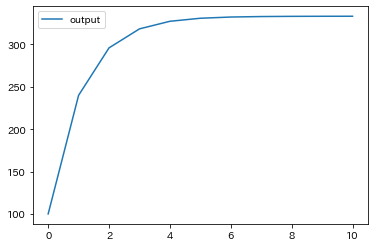

In [7]:
model45(100, a=50, b=0.5, d=50, f=0.2).plot()
pass

```{admonition} コードの説明
:class: dropdown

`model45()`の返り値は`DataFrame`である。そのメソッド`.plot()`を直接使って図示している。
```

初期値は定常状態の値よりも低く設定されているため，産出量は徐々に増加することになる。初期値を定常状態の値よりも大きい場合どうなるか確認してみよう。

## 蜘蛛の巣モデル

もう一つの簡単な経済モデルを取り上げる。需要と供給モデルであり，均衡では価格と量が決定される。

* 需要曲線
    * 消費者は今期の価格に基づいて今期の需要を決める。
    
        $$
        d_t = a - bp_t,\quad a,b>0
        $$
        
* 供給曲線
    * 生産者は価格を観察し生産量を決めるが，その決定は１期前の価格に依存すると仮定する。例えば，農家が想定できる。種を植え収穫し市場に供給するまで時間が掛かることを$p_{t-1}$が捉えている。
    
        $$
        s_t = -c + dp_{t-1},\quad c,d>0
        $$
        
    * $t$期の供給量が$t-1$期の価格に依存することにより，動学的な動きが発生する事になる。
        
* 均衡条件

    $$
    d_t=s_t\equiv q_t
    $$

均衡式を１つにまとめる。

$$
p_t = \frac{a+c}{b} - \frac{d}{b}p_{t-1}
$$ (eq:8-cobweb)

この式から定常状態の安定性が簡単に確認できる。均衡が収束するのか発散するのかは需要と供給の価格の係数，言い換えると，需要と供給がどれだけ価格に反応するかに依存していることが分かる。この結果を需要曲線と供給曲線の傾きで表すために次のこと確認しよう。

$$
\text{需要曲線の傾き}=\frac{1}{b},
\quad
\text{供給曲線の傾き}=\frac{1}{d}
$$

* 収束：$\dfrac{d}{b}<1$もしくは$\dfrac{1}{b}<\dfrac{1}{d}$
    * 需要曲線と比べて供給曲線の傾きが大きい場合に長期均衡に収束する。
* 発散：$\dfrac{d}{b}>1$もしくは$\dfrac{1}{b}>\dfrac{1}{d}$
    * 需要曲線と比べて供給曲線の傾きが小さい場合に発散する。
* 2期間サイクル：$\dfrac{d}{b}=1$

式[](eq:8-cobweb)を使うと定常状態（長期的均衡）の価格は次のように計算できる。

$$
\begin{align*}
p_*
&= \frac{a+c}{b} - \frac{d}{b}p_{*} \\
&\Downarrow \\
p_{*}&=\dfrac{a+c}{b+d}
\end{align*}
$$

また定常状態の量は需要曲線もしくは供給曲線を使って計算する。

$$
q_t=q_{*}=a-bp_{*}
$$

{numref}`fig:8-cobweb`は価格$p_t$の動学を示している。需要曲線に比べて供給曲線がより急な傾きになっているため定常状態に収束している。その逆の場合は発散することになるので図を描いて確かめてみよう。

```{figure} /images/cobweb.jpeg
---
scale: 35%
name: fig:8-cobweb
---
蜘蛛の巣モデル（モデル名は均衡の軌跡が蜘蛛の巣に似てるため）
```

次にコードを書いて価格と量の動学を確かめるが，45度線モデルと同じように関数を作りプロットする。

In [8]:
def cobweb(p0,a,b,c,d,n=10):
    """引数
            p0: 初期値
            a: 需要曲線の切片
            b: 需要曲線の傾き
            c: 供給曲線の切片
            d: 供給曲線の傾き
        返り値：
            価格と量のDataFrame
    """
    
    p = p0       # 初期の価格
    
    q_list = []
    p_list = []

    for i in range(n):
        
        p = (a+c)/b - (d/b)*p
        q = a-b*p

        q_list.append(q)
        p_list.append(p)

    # 定常状態
    pss = (a+c)/(b+d)
    qss = a-b*pss
    
    print(f'定常状態での価格:{pss:.1f}\n定常状態での量:　{qss:.1f}')
    
    dic = {'output':q_list, 'price':p_list}
    return pd.DataFrame(dic)

まず$\dfrac{d}{b}<1$を仮定し収束するケースを考えよう。

定常状態での価格:48.1
定常状態での量:　47.1


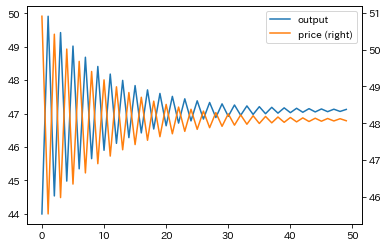

In [9]:
cobweb(45,a=100,b=1.1,c=1,d=1,n=50).plot(secondary_y='price')
pass

```{admonition} コードの説明
:class: dropdown

`.plot()`の引数`secondary_y`は右の縦軸の変数をしている。ここでは`'price'`を指定している。凡例を見ると`price (right)`となっている。
```

$\dfrac{d}{b}>1$を仮定し発散するケースをプロットする。

定常状態での価格:48.1
定常状態での量:　51.9


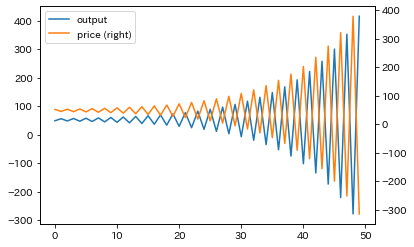

In [10]:
cobweb(45,a=100,b=1,c=1,d=1.1,n=50).plot(secondary_y='price')
pass